## 1.- Librerias

In [ ]:
# Instalar librerias
!pip install salem
!pip install Basemap
!pip install netCDF4
!pip install cartopy
!pip install wrf-python
!pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 49.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wrf-python: filename=wrf_python-1.3.4.1-cp310-cp310-linux_x86_64.whl size=627022 sha256=7cdc7bf8500480235bb721bae3331adbc911a6719426bacc17c70ebdb7d964de
  Stored in directory: /root/.cache/pip/wheels/67/e1/53/9fa18acf00e88c15b3038e736ce7cd23cfb37361a2564d4db5
Successfully built wrf-python
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 9.2 MB/s eta 0:00:00


In [ ]:
#-------------------------------------------------------------------------------
# Library import
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords
from mpl_toolkits.basemap import Basemap
from salem import geogrid_simulator
import matplotlib.ticker as mticker
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import netCDF4
import salem
import glob
import os
#-------------------------------------------------------------------------------
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#-------------------------------------------------------------------------------


In [ ]:
#-------------------------------------------------------------------------------
# Montar carpeta contenedor de datos
from google.colab import drive
drive.mount('/content/drive')
#-------------------------------------------------------------------------------

Mounted at /content/drive


In [ ]:
#-------------------------------------------------------------------------------
# Data
#path = "/Volumes/GoogleDrive-101458676915921006746/Mi unidad/WRF_Chem/datos_WRF/"
path = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
#-------------------------------------------------------------------------------

## 2. Plot T2

### 2.1. xarray

In [ ]:
image_nc15k = xr.open_dataset(path+"wrfout_d01_2023-11-08_00:00:00")
image_nc3k = xr.open_dataset(path+"wrfout_d02_2023-11-08_00:00:00")
print(image_nc3k)

In [ ]:
#-------------------------------------------------------------------------------
# Seleccionado vatiable
nc_dataT, nc_dataT2 = image_nc15k["T2"] , image_nc3k["T2"]
#-------------------------------------------------------------------------------

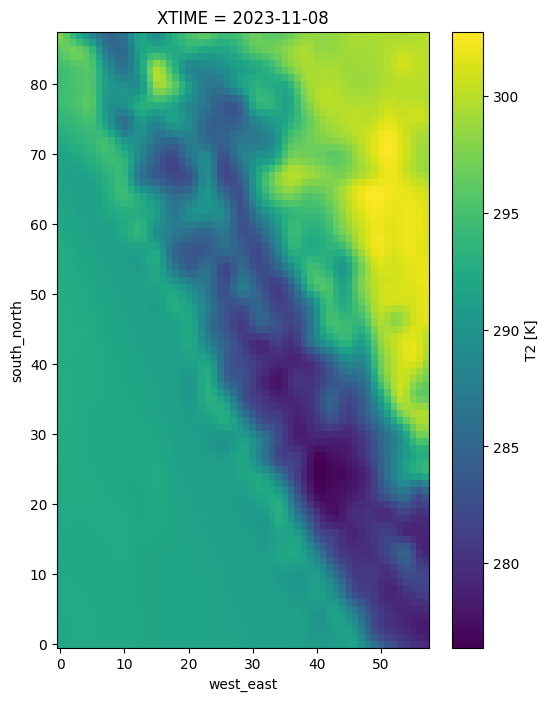

In [ ]:
#--------------------------------------
# Plot por defecto
nc_dataT.plot(figsize=(6, 8))
plt.draw()
#--------------------------------------


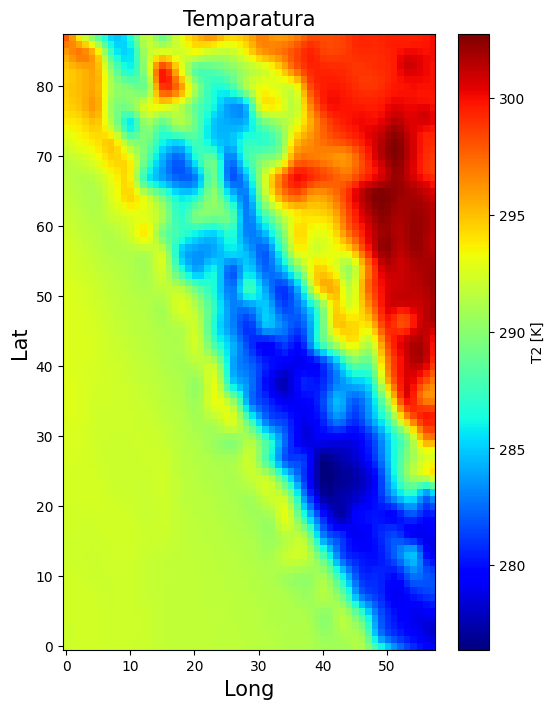

In [ ]:
# plot image
nc_data2d = nc_dataT.squeeze()
#
plt.figure( num=None, figsize=(6, 8))
nc_data2d.compute().plot.imshow(cmap="jet", vmin=np.min(nc_data2d),
                                               vmax=np.max(nc_data2d) )
# Add a colorbar
#plt.grid()
plt.title("Temparatura", fontsize=15)
#plt.axis("equal")
plt.xlabel("Long", fontsize=15)
plt.ylabel("Lat", fontsize=15)
plt.show()

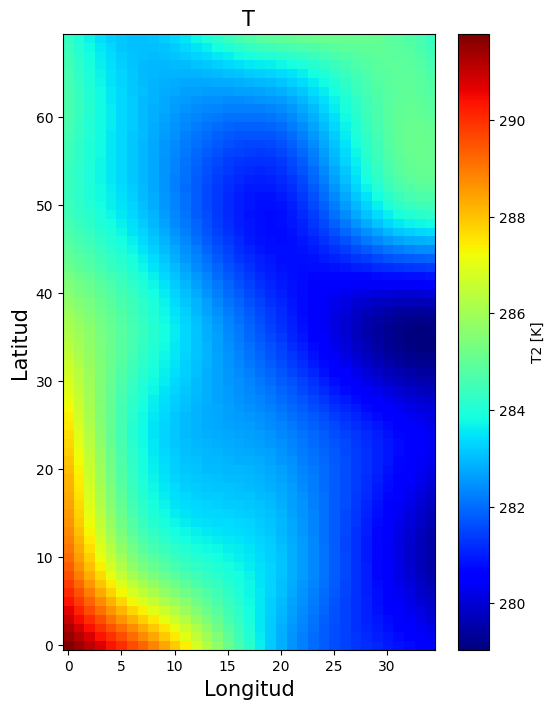

In [ ]:
# plot image
nc_data2d = nc_dataT2.squeeze()
#
#plt.figure()
plt.figure( num=None, figsize=(6, 8))
nc_data2d.compute().plot.imshow(cmap="jet", vmin=np.min(nc_data2d),
                                               vmax=np.max(nc_data2d) )
# Add a colorbar
#plt.grid()
plt.title("Temperatura(K)", fontsize=15)
#plt.axis("equal")
plt.xlabel("Long", fontsize=15)
plt.ylabel("Lat", fontsize=15)
plt.show()

Text(0, 0.5, 'Latitud')

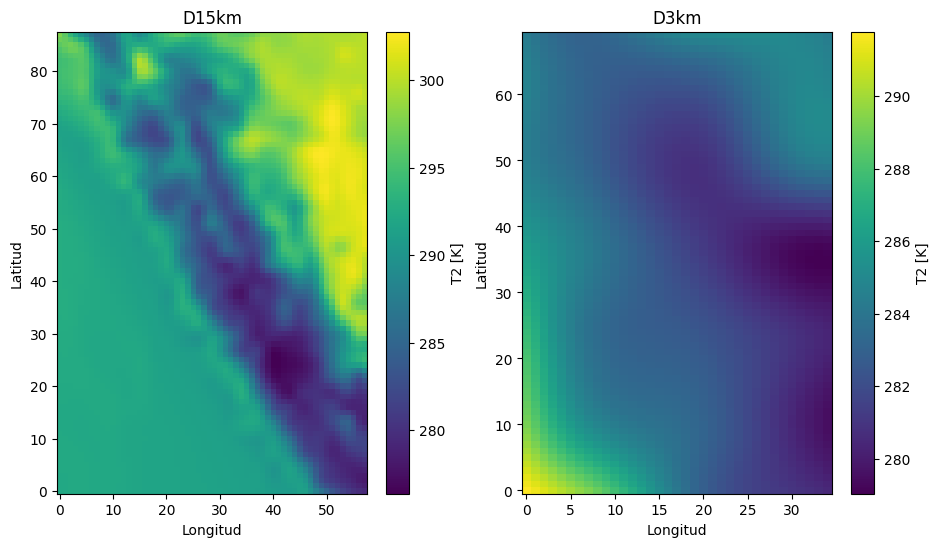

In [ ]:
plt.figure(figsize=[11,6])
#---------------------------------------------------------
plt.subplot(1,2,1)
diff = nc_dataT
diff.plot(vmin=np.min(nc_dataT), vmax=np.max(nc_dataT))
# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#---------------------------------------------------------
plt.subplot(1,2,2)
diff = nc_dataT2
diff.plot(vmin=np.min(nc_dataT2), vmax=np.max(nc_dataT2))
# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#---------------------------------------------------------


Text(0, 0.5, 'Latitud')

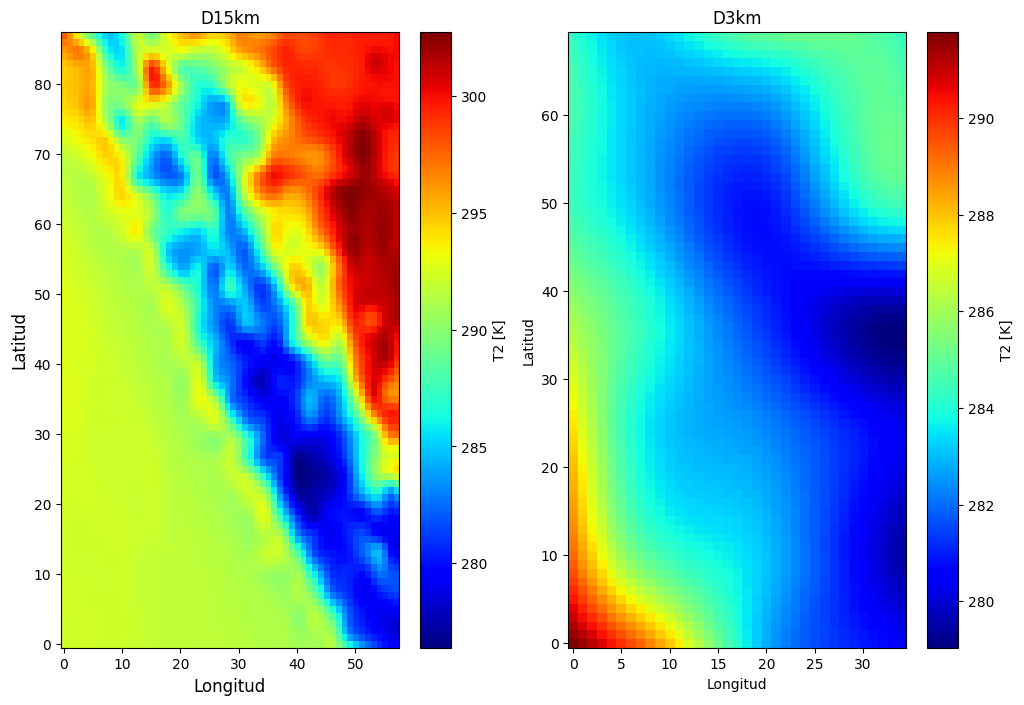

In [ ]:
#-----------------------------------------------------------------
# plot image
plt.figure( num=1, figsize=(12, 8))

#-----------------------------------------------------------------
plt.subplot(1,2,1)
nc_datad = nc_dataT.squeeze()
nc_datad.compute().plot.imshow(cmap="jet", vmin=np.min(nc_datad),
                                           vmax=np.max(nc_datad)  )
# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
#-----------------------------------------------------------------
plt.subplot(1,2,2)
nc_data2d = nc_dataT2.squeeze()
nc_data2d.compute().plot.imshow(cmap="jet", vmin=np.min(nc_data2d),
                                           vmax=np.max(nc_data2d) )
# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


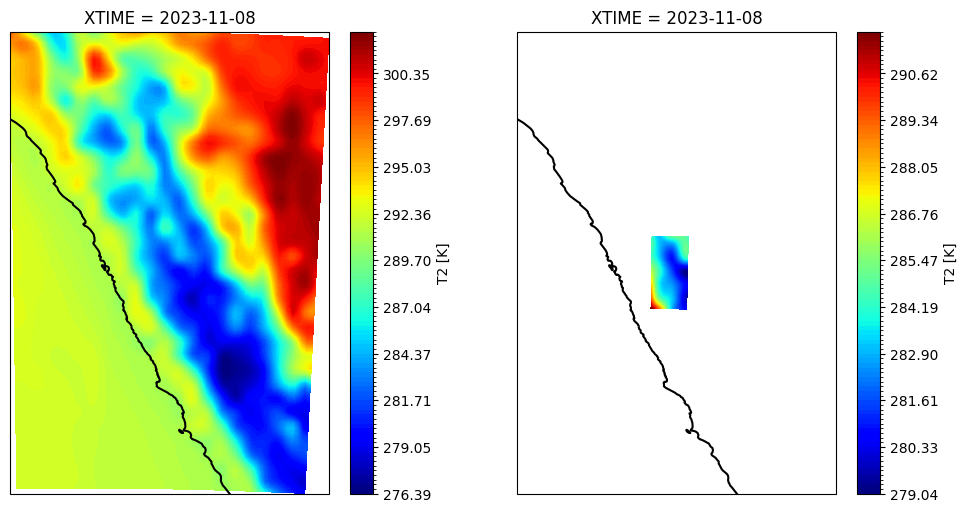

In [ ]:
#-------------------------------------------------------------------------------
# Extracción de coordenadas
lat = nc_dataT.coords['XLAT']
lon = nc_dataT.coords['XLONG']
#-------------------------------------------------------------------------------
nc_datad = nc_dataT.squeeze() # Devuelve una matriz con los mismos datos pero con dimensiones remodeladas.
nc_data2d = nc_dataT2.squeeze()
#-------------------------------------------------------------------------------
fig, axarr = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':ccrs.PlateCarree()},
                          figsize=[12,6])


for ds, ax in zip([nc_datad, nc_data2d], axarr.flat ):
    ds.plot.contourf(ax=ax, levels=100, vmin=np.min(ds),vmax=np.max(ds),
                     x='XLONG', y='XLAT', transform=ccrs.PlateCarree(),
                     cmap="jet" )
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)],
                  ccrs.PlateCarree())
    ax.coastlines(resolution="10m",linewidth=1.5)
#-------------------------------------------------------------------------------
# https://www.w3resource.com/numpy/manipulation/squeeze.php

### 2.2. salem

In [ ]:
# Cargamos el dato para graficar
path = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"

ds = salem.open_wrf_dataset(path + "wrfout_d01_2023-11-08_00:00:00")
ds2 = salem.open_wrf_dataset(path + "wrfout_d02_2023-11-08_00:00:00")
ds.T2

<xarray.DataArray 'T2' (time: 1, south_north: 88, west_east: 58)>
[5104 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 -13.09 -13.09 ... -5.15 -5.155
    lon          (south_north, west_east) float32 -80.11 -80.02 ... -74.61
    xtime        (time) datetime64[ns] ...
  * time         (time) datetime64[ns] 2023-11-08
  * west_east    (west_east) float64 -1.874e+05 -1.724e+05 ... 6.676e+05
  * south_north  (south_north) float64 -6.503e+05 -6.353e+05 ... 6.547e+05
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=-9.19998931884766 +lon_0=-79 +lat_1=30 +la...

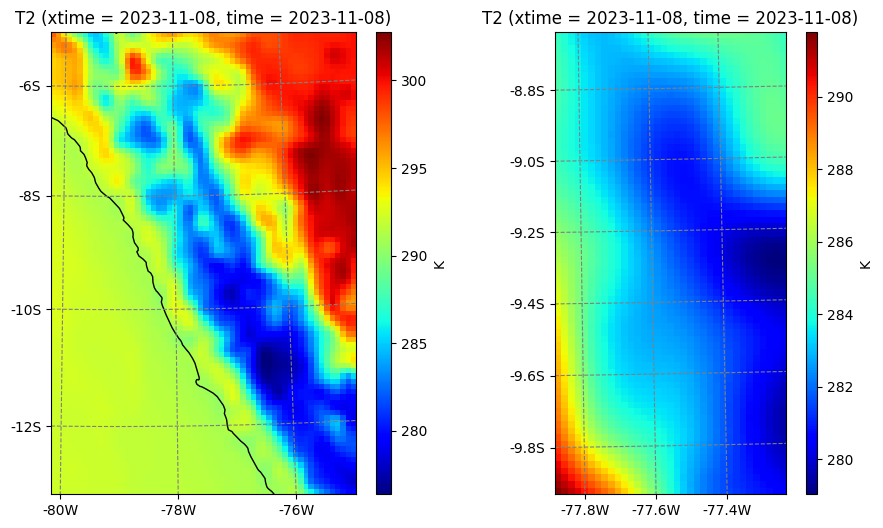

In [ ]:
#-------------------------------------------------------------------------------
plt.figure(figsize=[11,6])
#-------------------------------------------------------------------------------
plt.subplot(1,2,1)

nc_data1d = ds.T2.squeeze()
ds.T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data1d),
                                   vmax=np.max(nc_data1d))
#-------------------------------------------------------------------------------
plt.subplot(1,2,2)

nc_data2d = ds2.T2.squeeze()
ds2.T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#-------------------------------------------------------------------------------

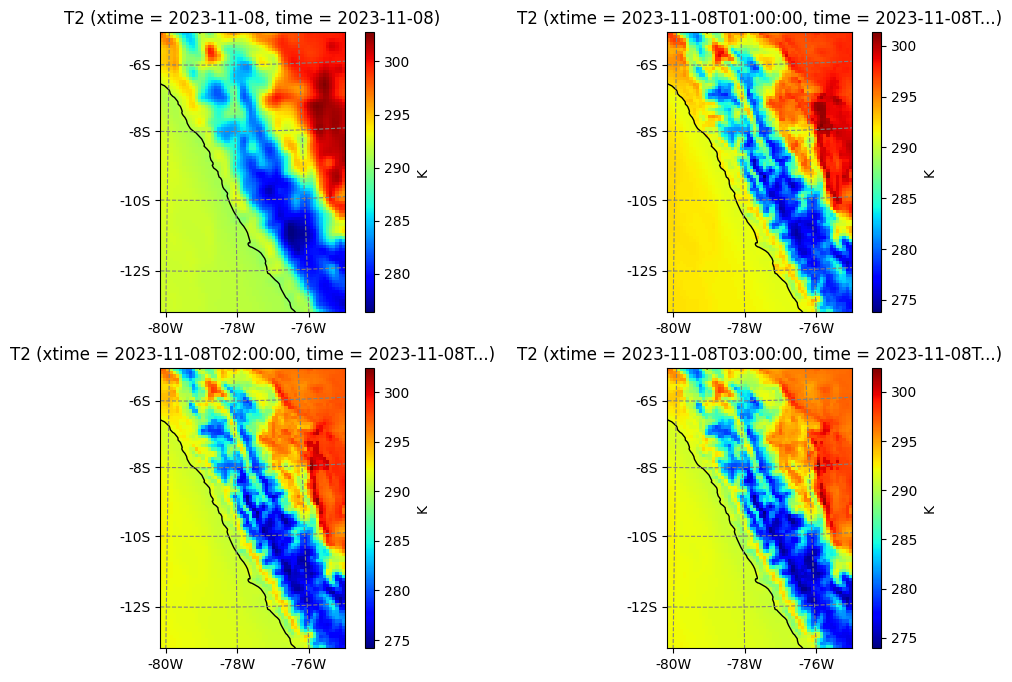

In [ ]:
from salem import open_wrf_dataset as DatasetS

#---------------------------------------------------------------------------
# Cargando los datos
pathNC = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
# Cargando solo con formato
list_i = glob.glob(pathNC + "wrfout_d01*")

list_iv = list_i[0:4]
wrf_inS = [DatasetS(x) for x in list_iv]
#---------------------------------------------------------------------------

plt.figure(figsize=[12,8])
#---------------------------------------------------------
plt.subplot(2,2,1)

nc_data1d = wrf_inS[0].T2.squeeze()
wrf_inS[0].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data1d),
                                   vmax=np.max(nc_data1d))
#---------------------------------------------------------
plt.subplot(2,2,2)


nc_data2d = wrf_inS[1].T2.squeeze()
wrf_inS[1].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------
plt.subplot(2,2,3)
#
nc_data2d = wrf_inS[2].T2.squeeze()
wrf_inS[2].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------
plt.subplot(2,2,4)

nc_data2d = wrf_inS[3].T2.squeeze()
wrf_inS[3].T2.isel(time=0).salem.quick_map(cmap='jet',vmin=np.min(nc_data2d),
                                   vmax=np.max(nc_data2d))
#---------------------------------------------------------------------------


&share
 wrf_core = 'ARW',
 max_dom = 2,
 start_date = '2023-11-08_00:00:00','2023-11-08_00:00:00',
 end_date   = '2023-11-09_00:00:00','2023-11-09_00:00:00',
 interval_seconds = 3600
 /

&geogrid
 parent_id         =   1,   1,
 parent_grid_ratio =   1,   5,
 i_parent_start    =   1,   26,
 j_parent_start    =   1,   37,
 e_we              =   59,  36,
 e_sn              =   89,  71,
 geog_data_res = 'default','default',
 dx = 15000,
 dy = 15000,
 map_proj  = 'mercator',
 ref_lat   =  -9.2,
 ref_lon   = -77.5,
 truelat1  =  -9.2,
 !truelat2  =  60.0,
 stand_lon = -77.5, ! meridiano central del dominio
 geog_data_path = '/home/aireandino/Models/WRF-Chem/WPS_GEOG/'
 /
 
&ungrib
 out_format = 'WPS',
 prefix = 'GFS',
/
 
&metgrid
 fg_name = 'FILE'
 /


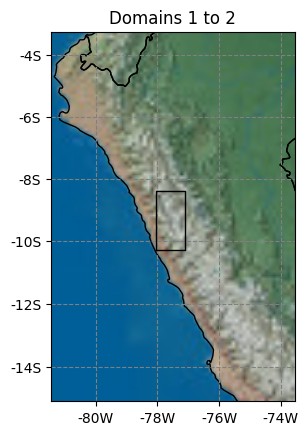

In [ ]:
#-------------------------------------------------------------------------------
# Cargado namelist.wps
pathWPS = "drive/MyDrive/WRF_Chem/datos_WRF/test/"
fpath = pathWPS + "C_phanton_namelist.wps"
#-------------------------------------------------------------------------------
with open(fpath, 'r') as f:  # this is just to show the file
    print(f.read())

g, maps = geogrid_simulator(fpath)
maps[0].set_rgb(natural_earth='lr')  # add a background image
maps[0].visualize(title='Domains 1 to 2')
#-------------------------------------------------------------------------------

### 2.3. NetCDF

<ipython-input-30-fbb40d59ac85>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bm.contourf(x, y, to_np(smooth_slp), 10, cmap=get_cmap("jet"))


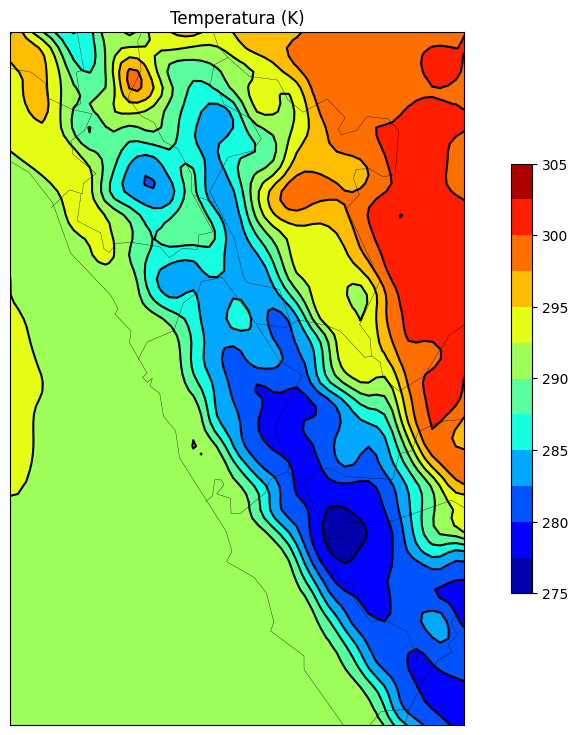

In [ ]:
#-------------------------------------------------------------------------------
# Open the NetCDF file
path = "drive/MyDrive/WRF_Chem/datos_WRF/20231108R/"
ncfile = Dataset(path+"wrfout_d01_2023-11-08_00:00:00")
# Get the sea level pressure
slp = getvar(ncfile, "T2")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the basemap object
bm = get_basemap(slp)

# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)
# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = bm(to_np(lons), to_np(lats))
# Draw the contours and filled contours
bm.contour(x, y, to_np(smooth_slp), 10, colors="black")
bm.contourf(x, y, to_np(smooth_slp), 10, cmap=get_cmap("jet"))
# Add a color bar
plt.colorbar(shrink=.62)
plt.title("Temperatura (K)", fontsize=12)
plt.show()
#-------------------------------------------------------------------------------

#https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.getvar.html

In [ ]:
#https://docs.xarray.dev/en/latest/user-guide/plotting.html
#https://researchworkspace.com/file/2588789/plot-wind-vectors-from-grid.ipynb?preview=true

## 3.- Plot - Vair

### 3.1. xarray

In [ ]:
#------------------------------------------

# 10-meter eastward wind m/s
U10M15k = image_nc15k['U10']
# 10-meter northward wind m/s
V10M15k = image_nc15k['V10']
#CALCULATE WIND SPEED
ws15k = np.sqrt(U10M15k**2 + V10M15k**2)
#------------------------------------------
# 10-meter eastward wind m/s
U10M3k = image_nc3k['U10']
# 10-meter northward wind m/s
V10M3k = image_nc3k['V10']
#CALCULATE WIND SPEED
ws3k = np.sqrt(U10M3k**2 + V10M3k**2)
#------------------------------------------


Text(0, 0.5, 'Latitud')

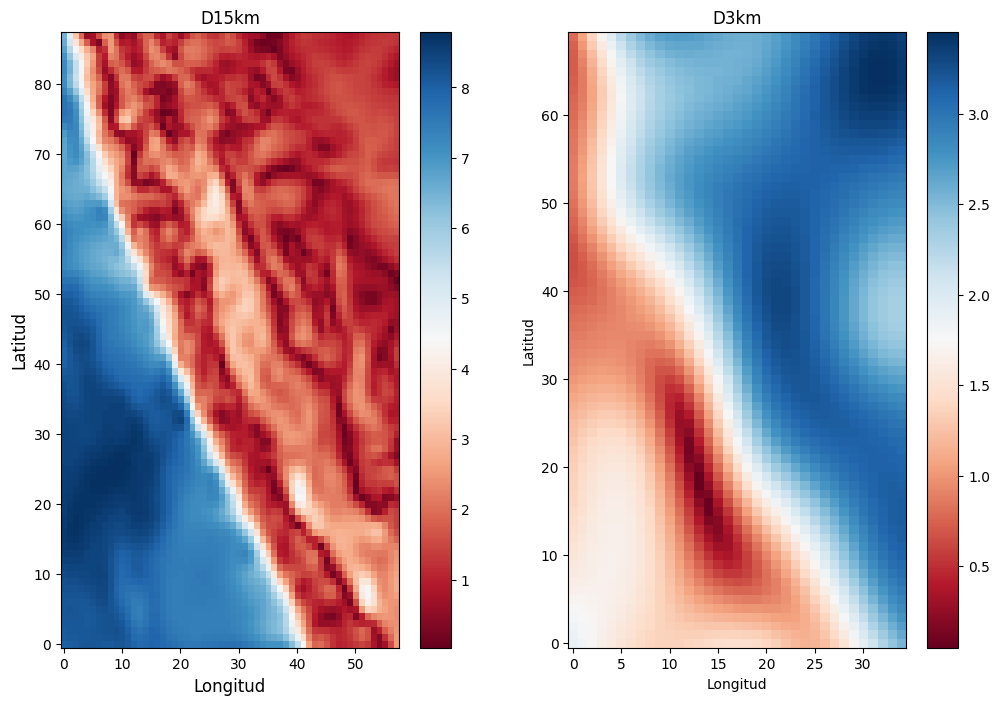

In [ ]:
# plot image
plt.figure( num=1, figsize=(12, 8))

#------------------------------------------------------------------
plt.subplot(1,2,1)
nc_ws15k = ws15k.squeeze()
nc_ws15k.compute().plot.imshow(cmap="RdBu", vmin=np.min(nc_ws15k),
                                           vmax=np.max(nc_ws15k)  )

# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
#------------------------------------------------------------------
plt.subplot(1,2,2)
nc_ws3k = ws3k.squeeze()
nc_ws3k.compute().plot.imshow(cmap="RdBu", vmin=np.min(nc_ws3k),
                                           vmax=np.max(nc_ws3k) )

# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)


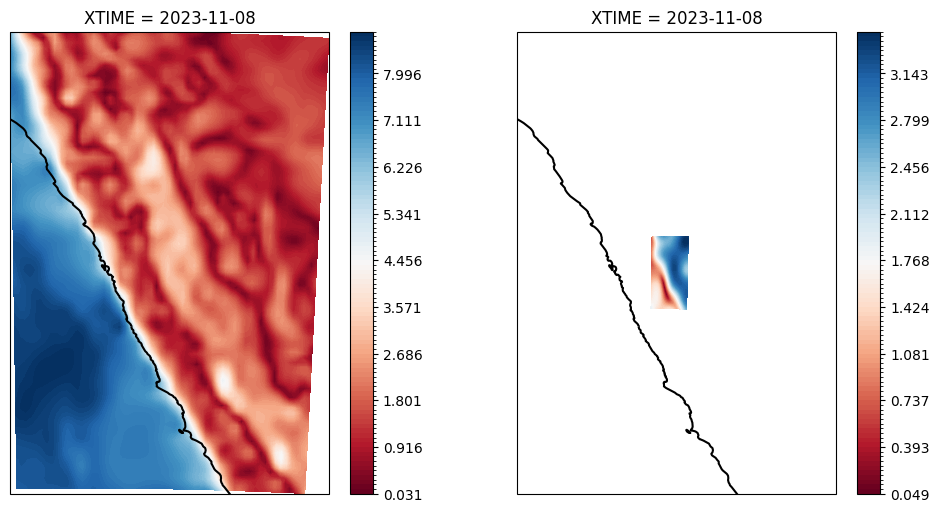

In [ ]:
lat = image_nc15k.coords['XLAT']
lon = image_nc15k.coords['XLONG']
#
nc_ws15k = ws15k.squeeze()
nc_ws3k = ws3k.squeeze()
#
fig, axarr = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':ccrs.PlateCarree()},
                          figsize=[12,6])

for ds, ax in zip([nc_ws15k, nc_ws3k], axarr.flat ):
    ds.plot.contourf(ax=ax, levels=100, vmin=np.min(ds), vmax=np.max(ds),
                     x='XLONG', y='XLAT', transform=ccrs.PlateCarree(), cmap="RdBu",
                     shrink=0.5)
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)],
                  ccrs.PlateCarree())
    ax.coastlines(resolution="10m",linewidth=1.5)



In [ ]:
#https://notebook.community/ajdawson/python_for_climate_scientists/course_content/notebooks/cartopy_intro

Text(0, 0.5, 'Latitud')

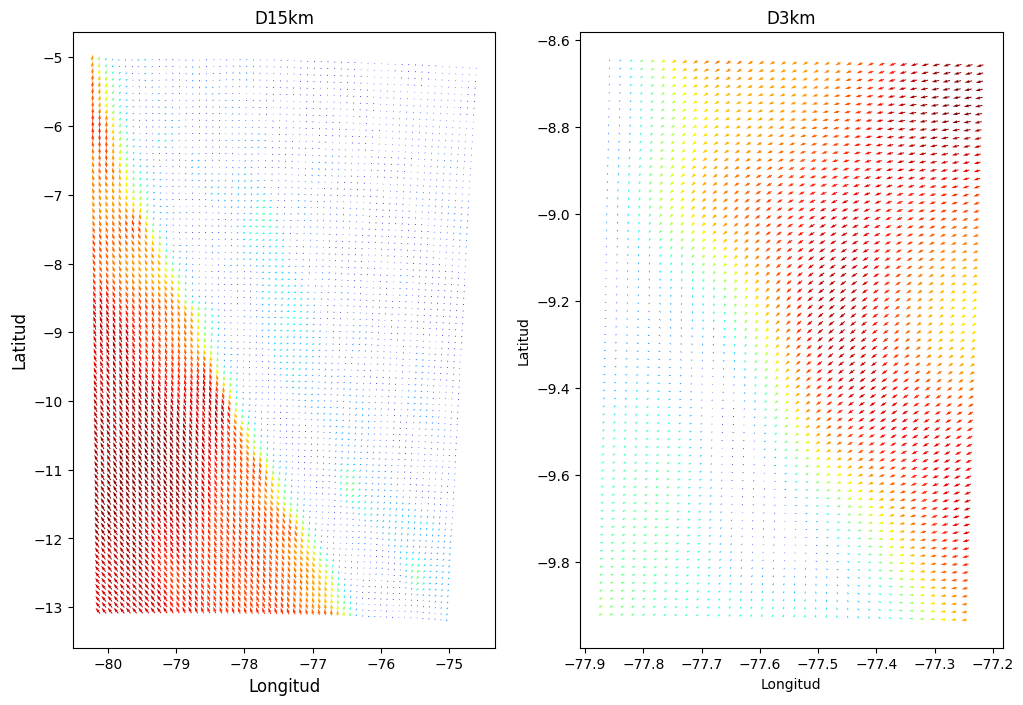

In [ ]:
#------------------------------------------
lat15k = nc_dataT.coords['XLAT']
lon15k = nc_dataT.coords['XLONG']

lat3k = nc_dataT2.coords['XLAT']
lon3k = nc_dataT2.coords['XLONG']
#-------------------------------------------------------------------
# plot image
plt.figure( num=1, figsize=(12, 8))

#------------------------------------------------------------------
plt.subplot(1,2,1)
plt.quiver(lon15k, lat15k, U10M15k[0,:,:], V10M15k[0,:,:],ws15k[0,:,:] ,
             cmap='jet', linewidth=1 )

# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
#------------------------------------------------------------------
plt.subplot(1,2,2)
plt.quiver(lon3k, lat3k, U10M3k[0,:,:], V10M3k[0,:,:],ws3k[0,:,:] ,
             cmap='jet', linewidth=1 )

# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#------------------------------------------------------------------

## Fin !!!

In [ ]:
#------------------------------------------------------------------